<h3>Examples of (statistical) plots with Pandas, Matplotlib, Seaborn</h3>

**Importing pandas and Seaborn module**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

#styles in matplotlib: https://matplotlib.org/stable/users/explain/customizing.html
print(plt.style.available)

plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**Importing Iris data set**

In [3]:
iris=sns.load_dataset("iris")


**Displaying data**

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
count=iris['species'].value_counts()
count

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

* direct visualization from dataframes


In [8]:
sns.countplot('species', data=iris)
plt.show()

NameError: name 'ax' is not defined

<Axes: >

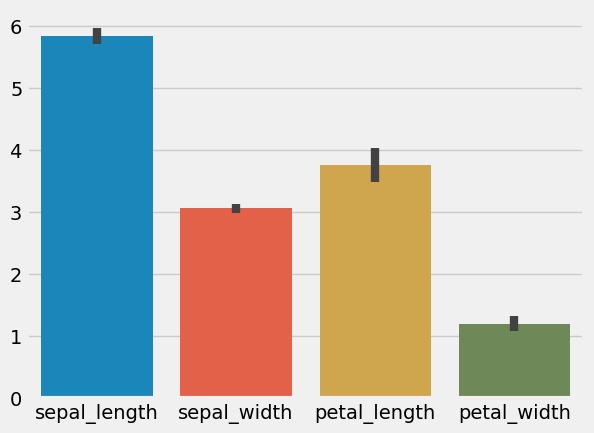

In [7]:
sns.barplot( data=iris)
#variables not specified

<Axes: xlabel='species', ylabel='sepal_width'>

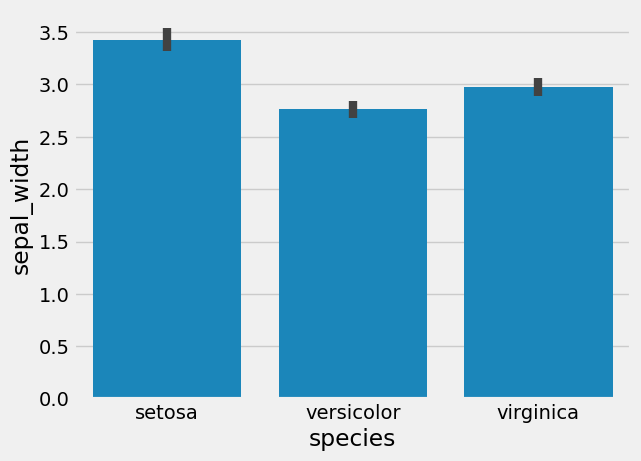

In [9]:
sns.barplot(x="species", y="sepal_width", data=iris)
#typically selection of variables for x and y

<Axes: xlabel='petal_width', ylabel='Count'>

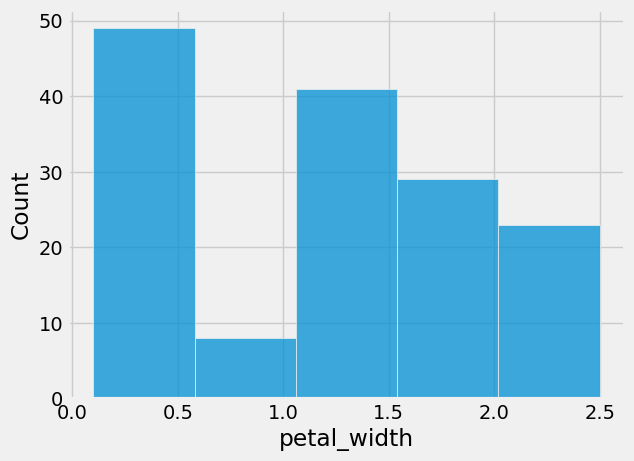

In [10]:
#if no selection, all the attributes are visualized
sns.histplot(data=iris["petal_width"], bins=5)

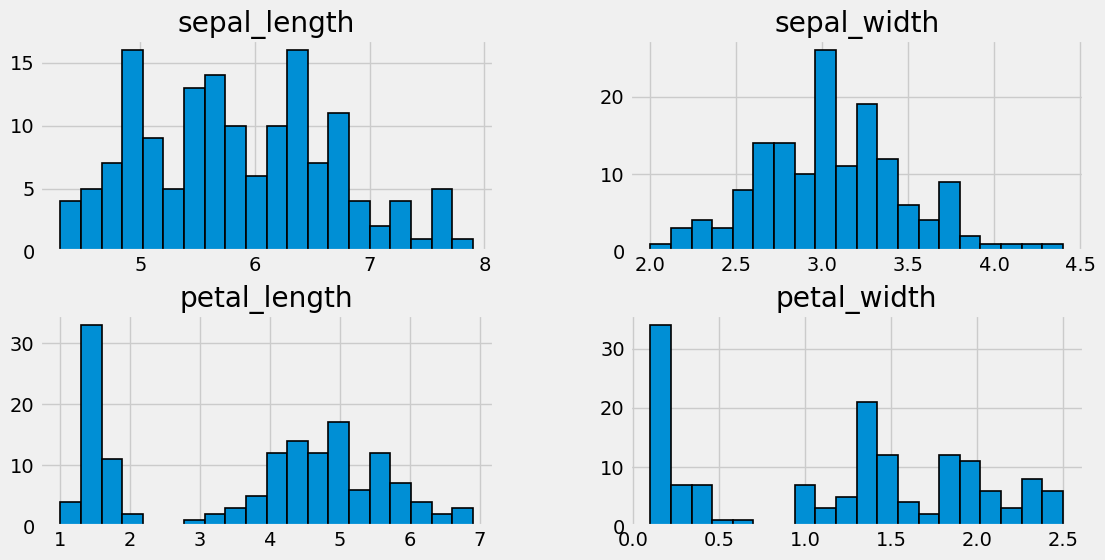

In [11]:
#Note that pandas has its own visualization functions based on matplotlib
#small multiples here, more readable
iris.hist(edgecolor='black', linewidth=1.2,bins=20)
fig=plt.gcf()
fig.set_size_inches(12,6)

<Axes: xlabel='sepal_length', ylabel='Density'>

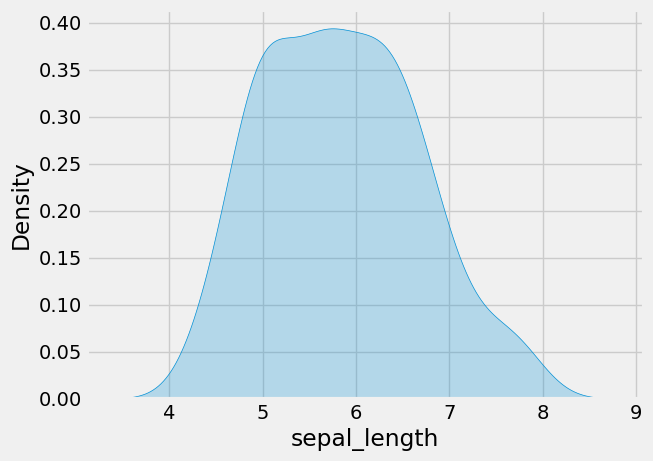

In [12]:
#seaborn has tools for showing density plots

sns.kdeplot(iris['sepal_length'], shade=True)

**Binning, hisogram+KDE

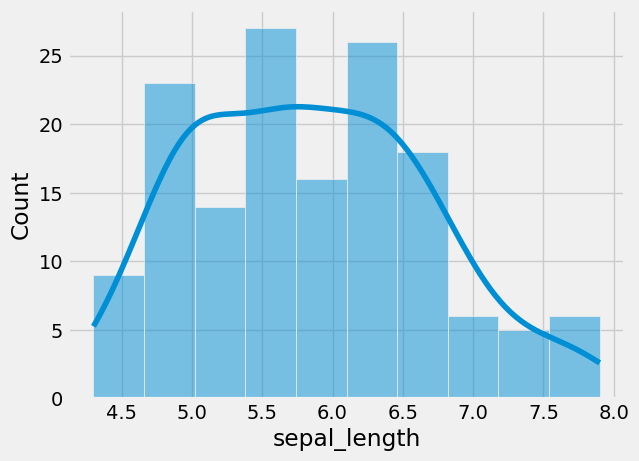

In [13]:

sns.histplot(iris['sepal_length'], kde=True,bins=10);

Correlation analysis

Text(0.8, 0.1, 'ρ = 0.96')

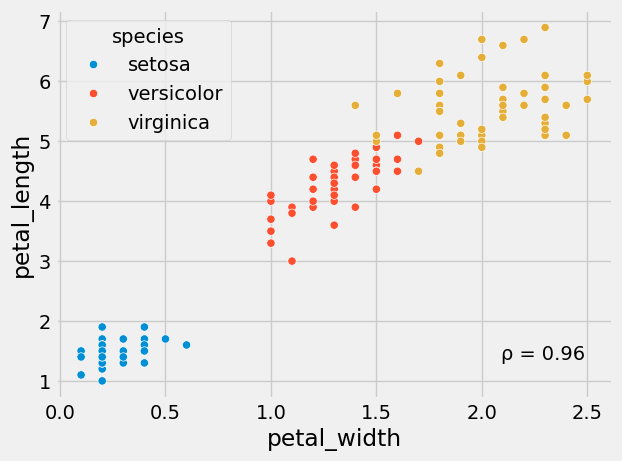

In [14]:
ax = sns.scatterplot(data=iris, x="petal_width", y="petal_length", hue="species")
r = np.corrcoef(iris.petal_width, iris.petal_length)
#add info on correlation coefficient
ax.annotate(f'ρ = {r[0,1]:.2f}', xy=(.8, .1), xycoords=ax.transAxes) # put correlation coefficient as overlay

**regression line:**
Plot line with regression model (95% confidence interval for that regression)
lmplot does this in seaborn

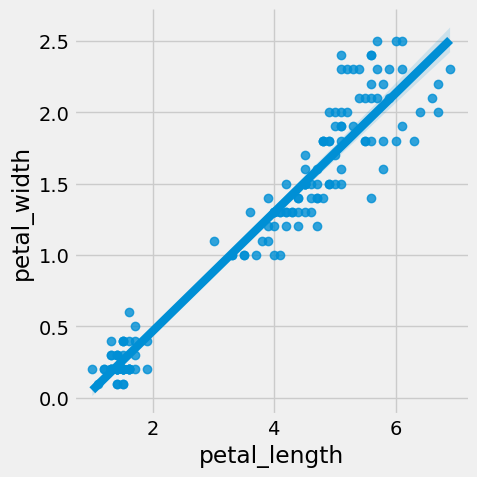

In [15]:
fig=sns.lmplot(x="petal_length", y="petal_width",data=iris)

**Joint plot:**
Jointplot is seaborn library specific- Scatter plot+marginal distributions (histograms)
can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

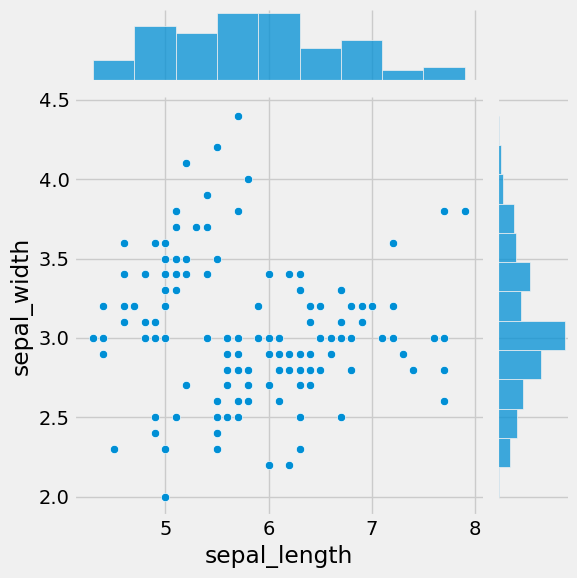

In [17]:
fig=sns.jointplot(x='sepal_length',y='sepal_width',data=iris)

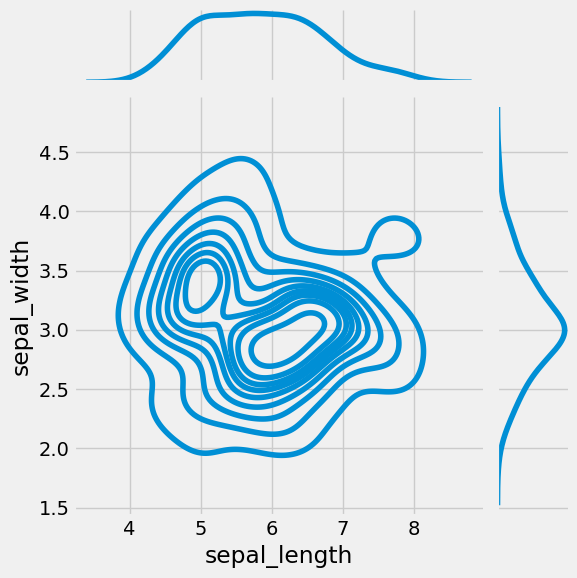

In [18]:
fig=sns.jointplot(x='sepal_length',y='sepal_width',data=iris,kind="kde")

**Pair Plot:**
A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.

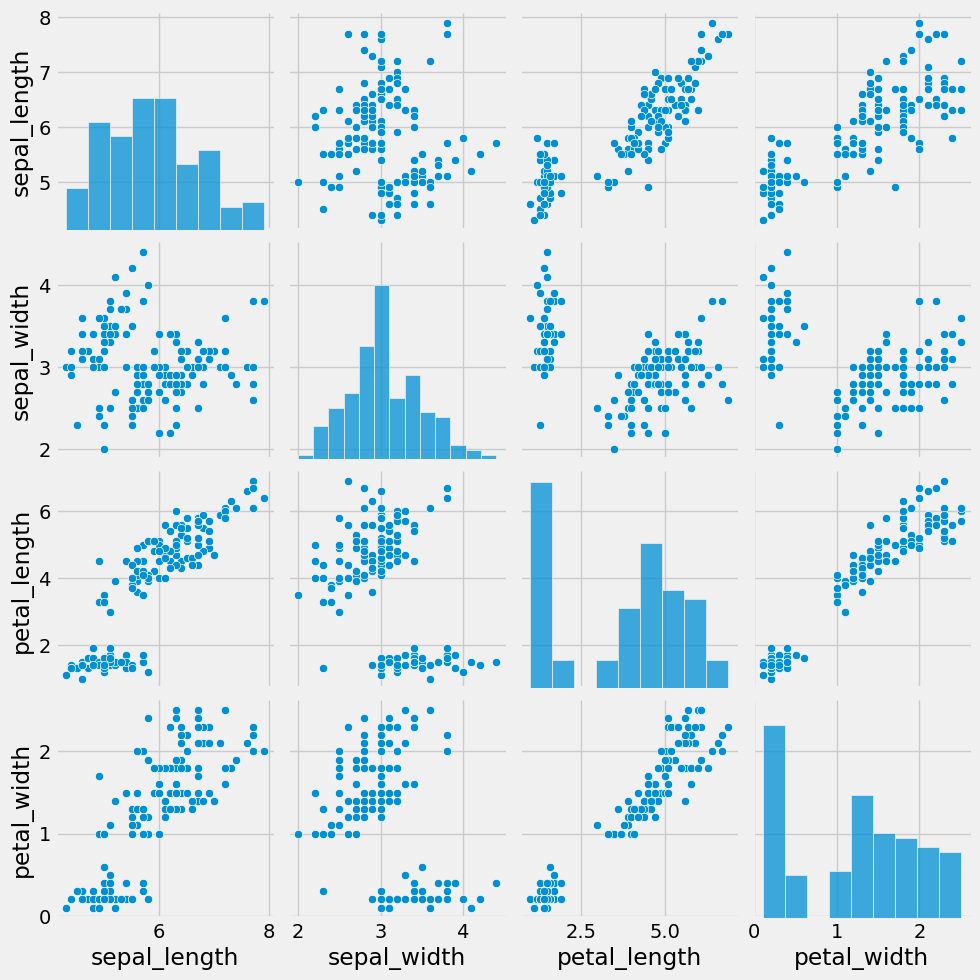

In [19]:
sns.pairplot(iris,kind='scatter')
pass

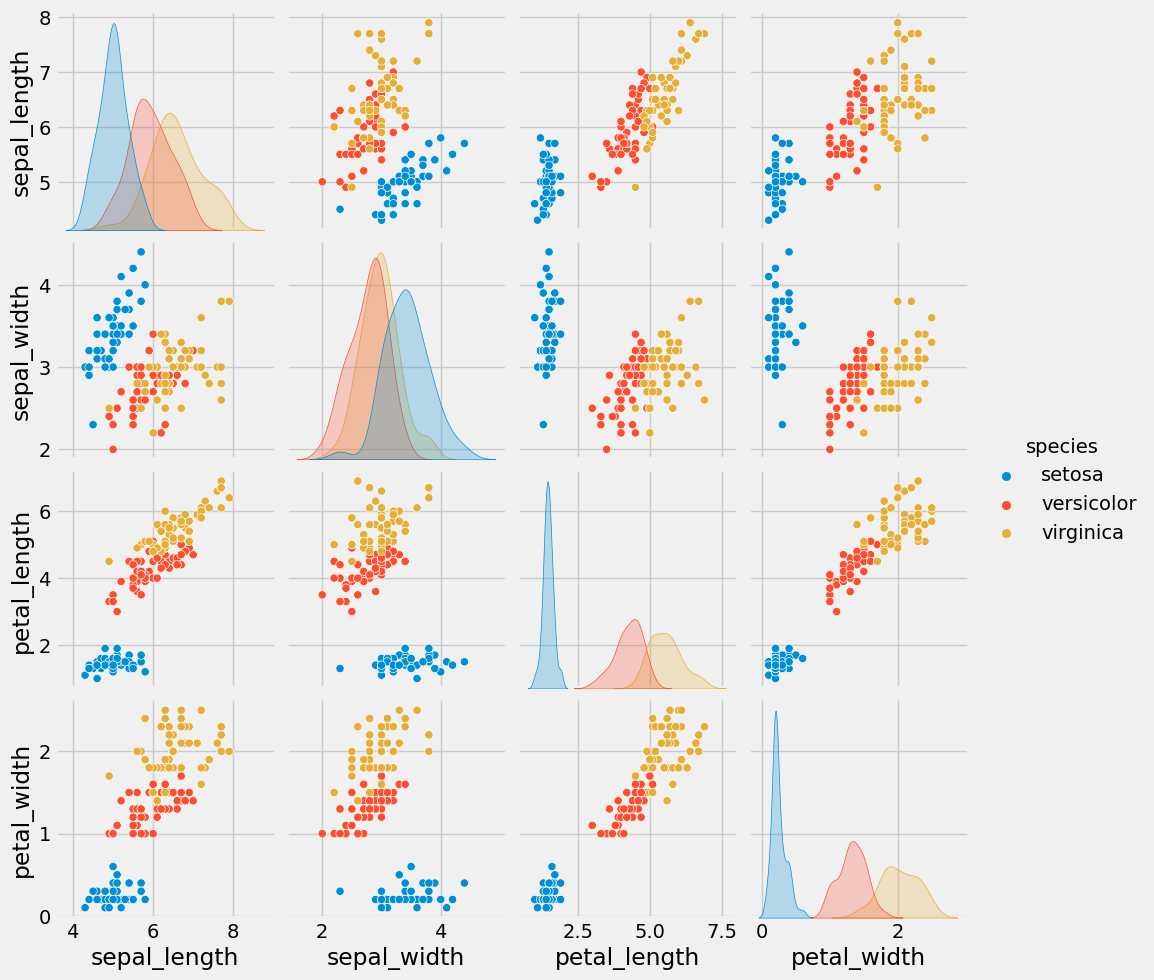

In [18]:
sns.pairplot(iris,hue='species');

**Boxplot or Whisker plot**
Box plot was was first introduced in year 1969 by Mathematician John Tukey.Box plot give a statical summary of the features being plotted.Top line represent the max value,top edge of box is third Quartile, middle edge represents the median,bottom edge represents the first quartile value.The bottom most line respresent the minimum value of the feature.The height of the box is called as Interquartile range.The black dots on the plot represent the outlier values in the data.

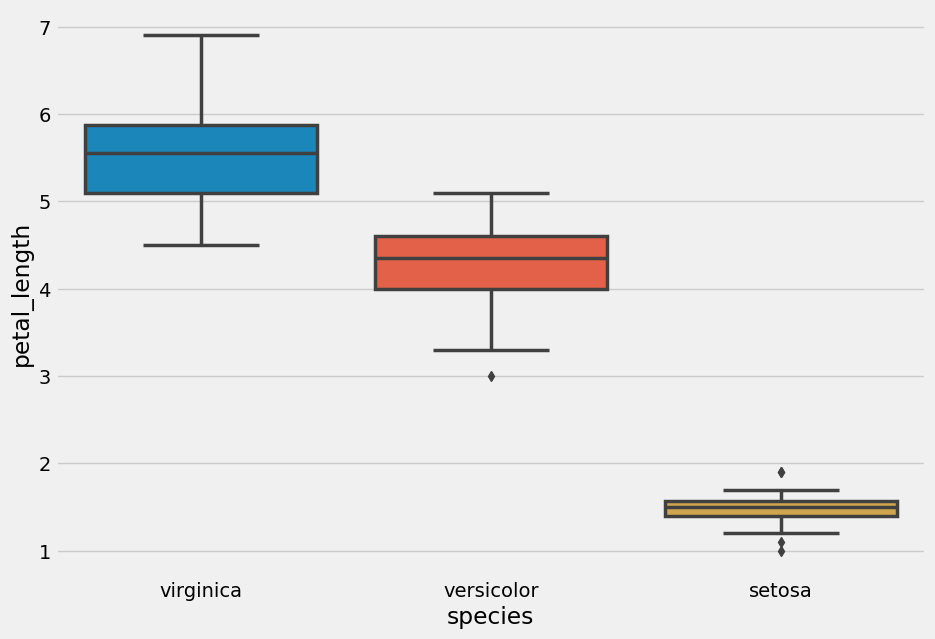

In [19]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species',y='petal_length',data=iris,order=['virginica','versicolor','setosa'],linewidth=2.5,orient='v',dodge=False)

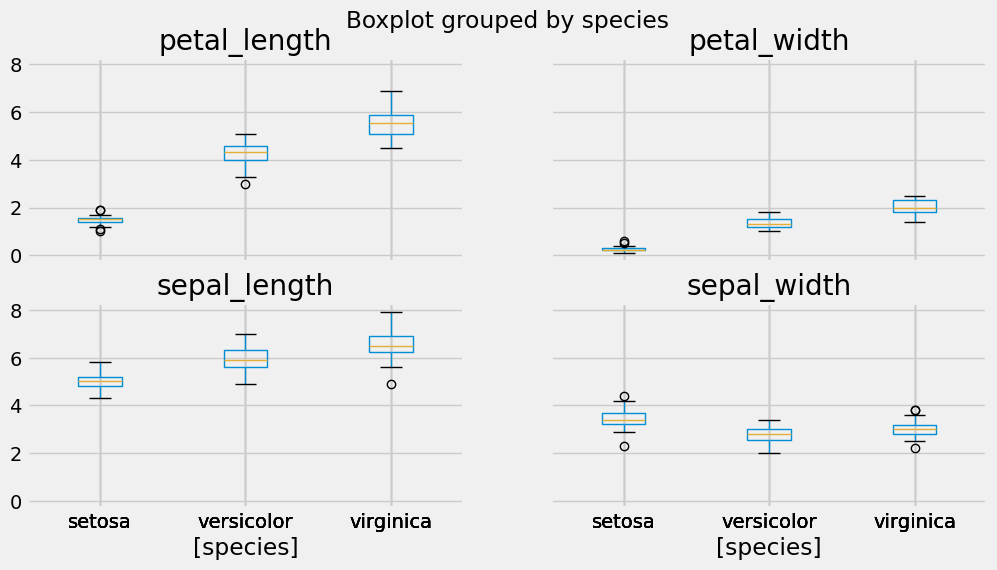

In [20]:
#Here too, the pandas function can represent all with small multiples!

iris.boxplot(by="species", figsize=(12, 6))
pass

**Strip plot**
represent all the data in detail, but need to shift to avoid occlusions

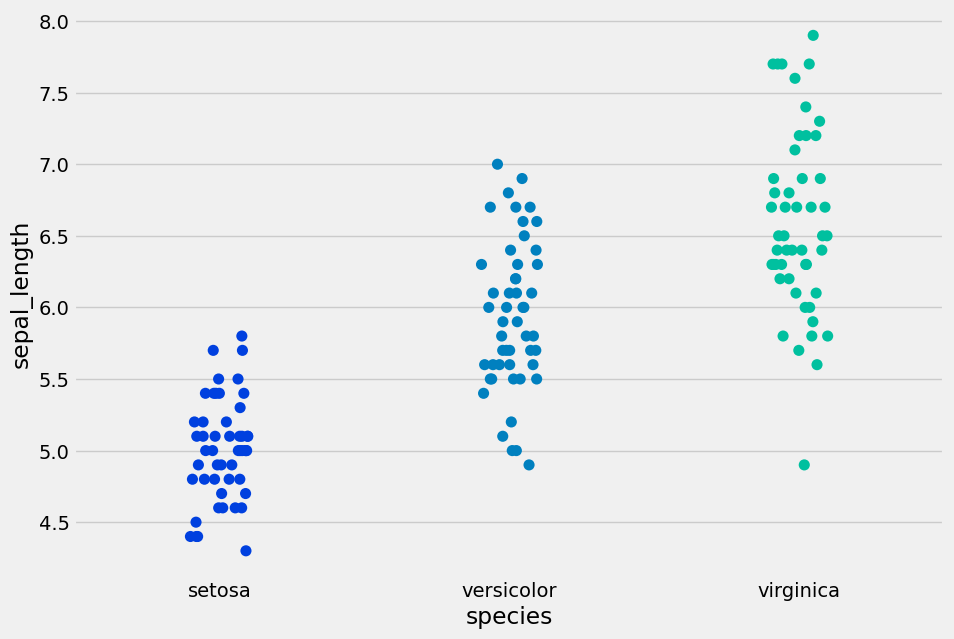

In [21]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='species',y='sepal_length',data=iris,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

**Combining Box and Strip Plots**
may help to understand the data

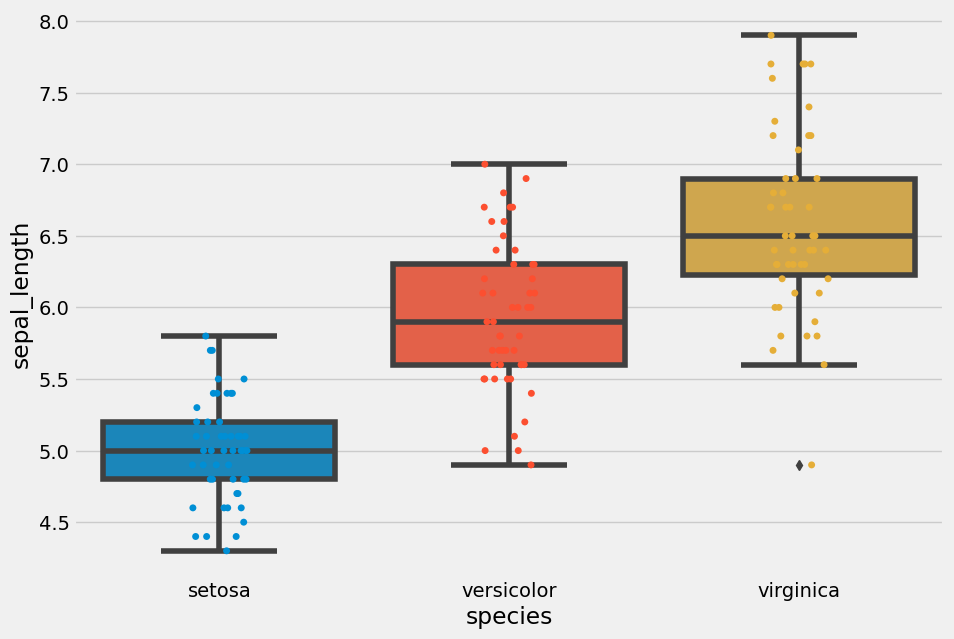

In [22]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species',y='sepal_length',data=iris)
fig=sns.stripplot(x='species',y='sepal_length',data=iris,jitter=True,edgecolor='gray')

**Violin Plot**
It is used to visualize the distribution of data and its probability distribution.This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.Box Plots are limited in their display of the data, as their visual simplicity tends to hide significant details about how values in the data are distributed

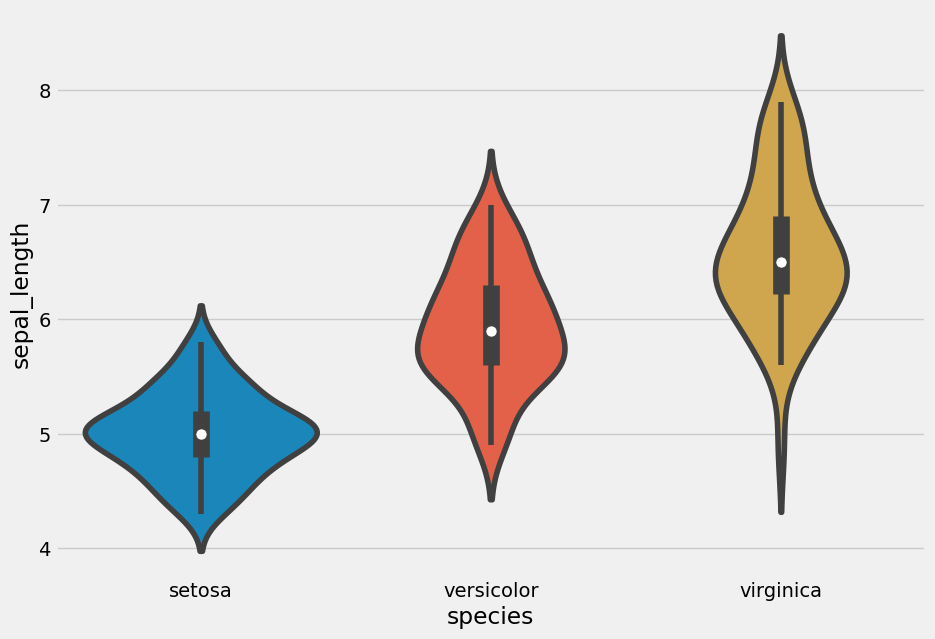

In [23]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='species',y='sepal_length',data=iris)

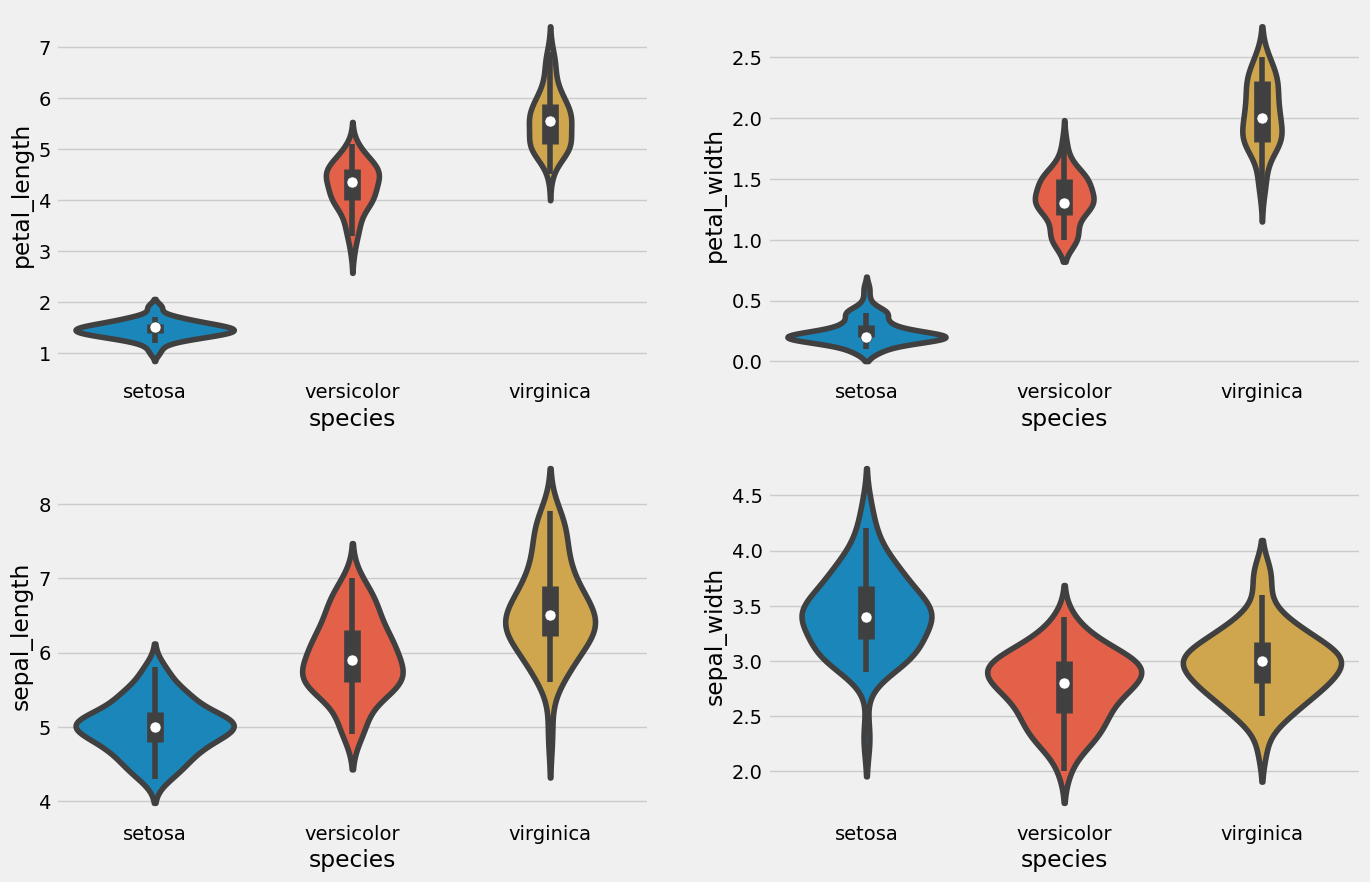

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)
pass

**Swarm plot**
It looks a bit like a friendly swarm of bees buzzing about their hive. More importantly, each data point is clearly visible and no data are obscured by overplotting.A beeswarm plot improves upon the random jittering approach to move data points the minimum distance away from one another to avoid overlays. The result is a plot where you can see each distinct data point, like shown in below plot




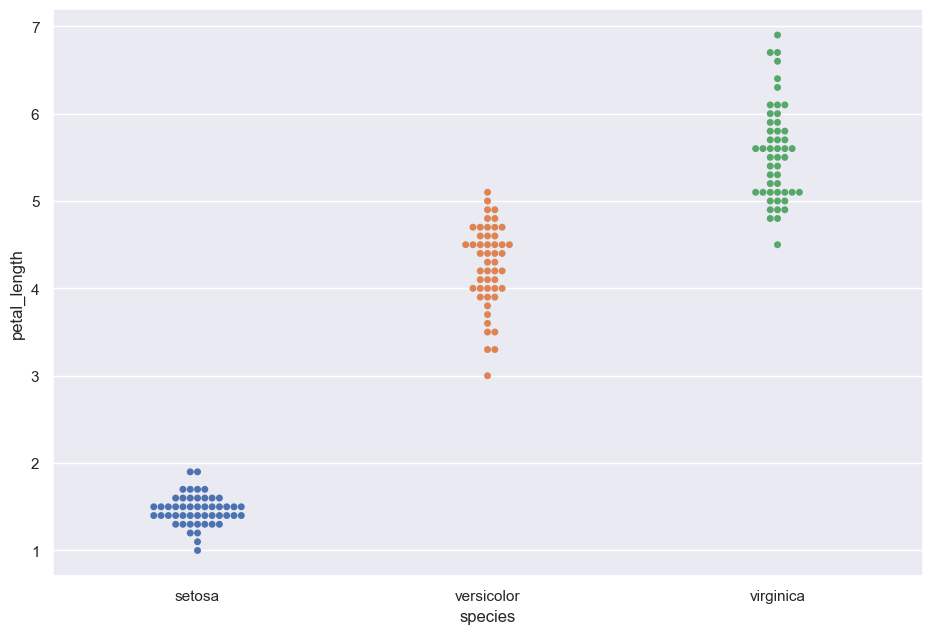

In [25]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="species", y="petal_length", data=iris)

**Box and Swarm plot combined**

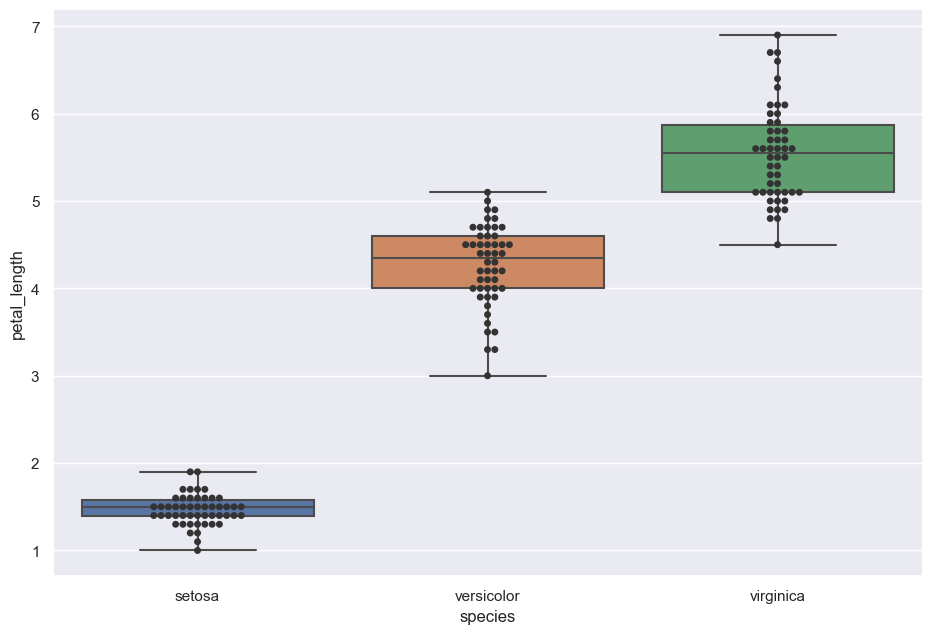

In [26]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x="species", y="petal_length", data=iris, whis=np.inf)
fig= sns.swarmplot(x="species", y="petal_length", data=iris, color=".2")

**Swarm  and Violin plot combined**

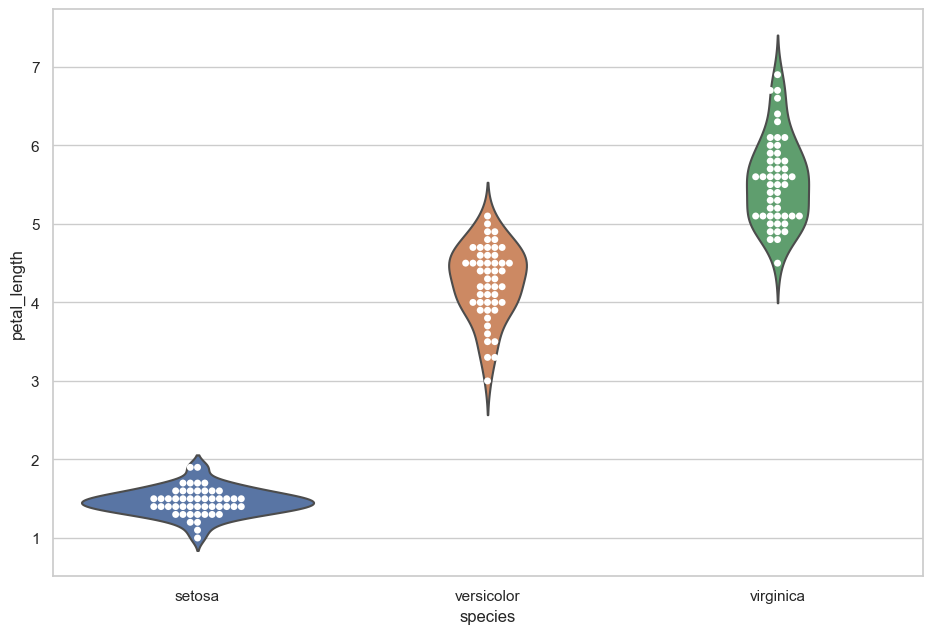

In [27]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="species", y="petal_length", data=iris, inner=None)
ax = sns.swarmplot(x="species", y="petal_length", data=iris,color="white", edgecolor="black")

**Heat map**
Heat map is used to find out the correlation between different features in the dataset.High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

(4.5, -0.5)

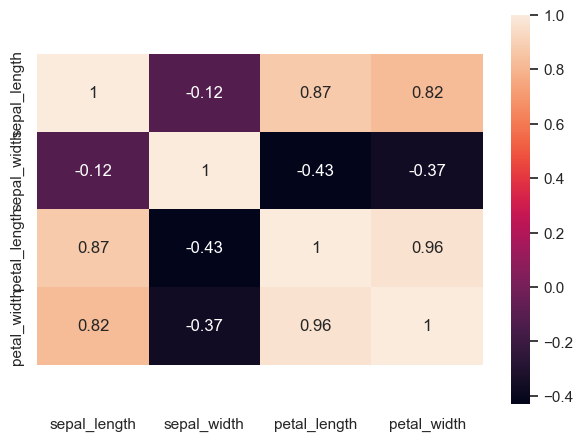

In [28]:
cmap=iris.corr()
ax = sns.heatmap(cmap,annot=True,cbar=True)
bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

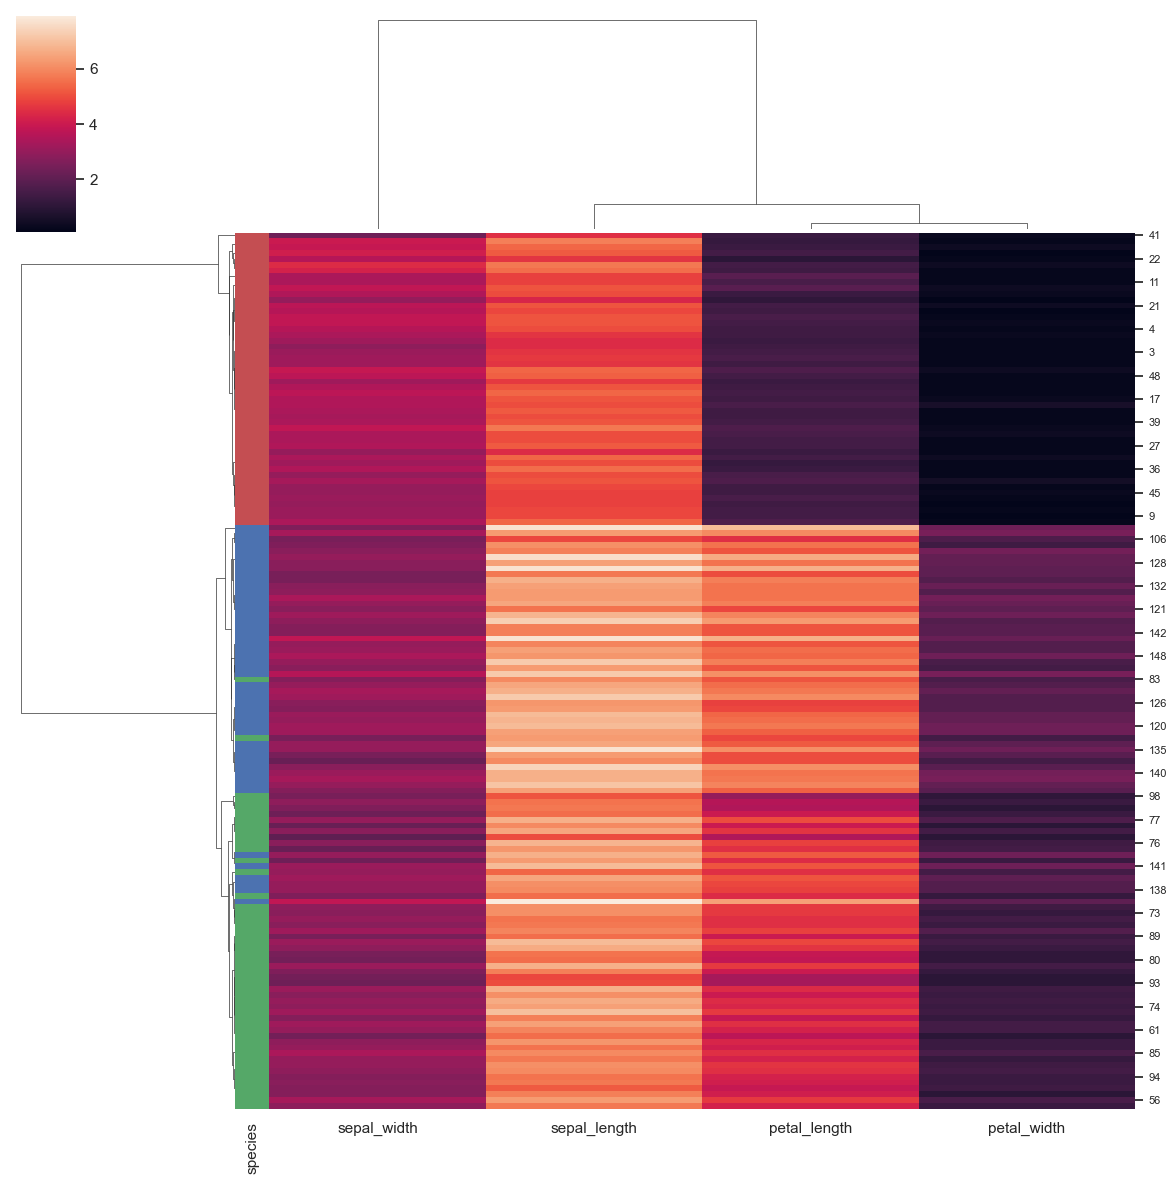

In [29]:
# cluster map (dendogram and tree)
df = iris.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]]
df1 = iris.species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

**Area Plot:**
Area Plot gives us a visual representation of Various dimensions of Iris flower and their range in dataset.

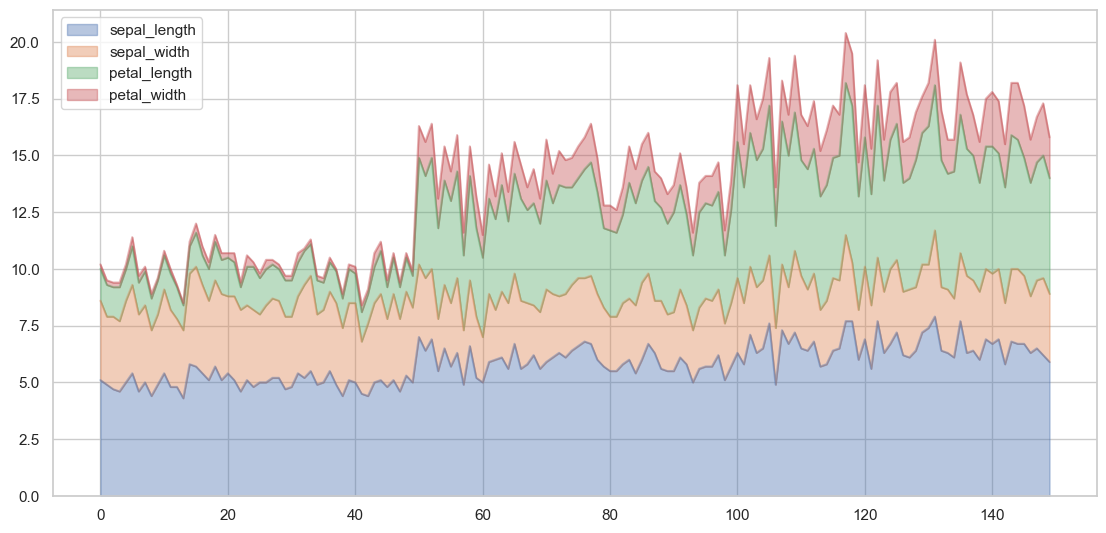

In [30]:

iris.plot.area(y=['sepal_length','sepal_width','petal_length','petal_width'],alpha=0.4,figsize=(12, 6));

**Cumulative Histogram**

AttributeError: 'Rectangle' object has no property 'normed'

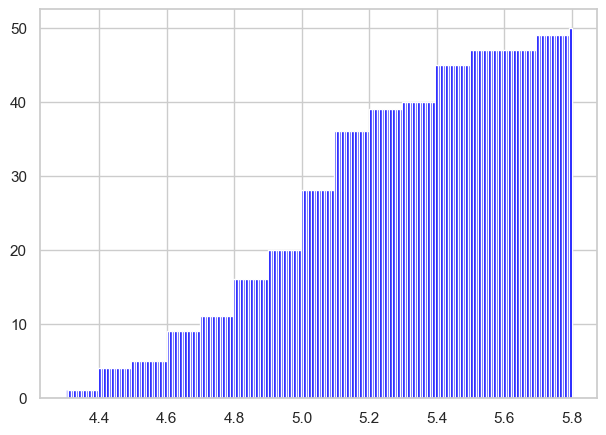

In [31]:
setosa=iris[iris['species']=='setosa']
versicolor=iris[iris['species']=='versicolor']
virginica=iris[iris['species']=='virginica']
setosa['sepal_length'].plot(kind='hist',bins=200,alpha=0.3,color='blue',cumulative=True,normed=True)
versicolor['sepal_length'].plot(kind='hist',bins=200,alpha=0.3,color='red',cumulative=True,normed=True)
virginica['sepal_length'].plot(kind='hist',bins=200,alpha=0.3,color='green',cumulative=True,normed=True)

plt.title('Sepal Length Distribution')
plt.legend(['Setosa','Versicolor','Virginica'])
plt.xlabel('Sepal Length in cm')

plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2);
#range=(50,80)

So we can see the cumulative distribution of Sepal Lenght and also theri region of overlap.